In [844]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [845]:
focused_lease = pd.read_csv('../Datasets/focused_lease.csv')
print(f"focused_lease: {focused_lease.shape[0]} rows and {focused_lease.shape[1]} columns")
focused_lease.head()
focused_lease.info()
focused_lease.describe()

focused_lease: 29484 rows and 38 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29484 entries, 0 to 29483
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            29484 non-null  int64  
 1   quarter                         29484 non-null  object 
 2   monthsigned                     28816 non-null  float64
 3   market                          29484 non-null  object 
 4   building_name                   24163 non-null  object 
 5   building_id                     29484 non-null  object 
 6   address                         29484 non-null  object 
 7   region                          29484 non-null  object 
 8   city                            29484 non-null  object 
 9   state                           29484 non-null  object 
 10  zip                             29484 non-null  float64
 11  internal_submarket              29484 non-null  obje

,year,monthsigned,zip,leasedSF,costarID,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,...,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,lat,lng
count,29484.000000,28816.000000,29484.000000,2.948400e+04,2.948400e+04,2.181200e+04,2.181200e+04,21812.000000,21812.000000,21812.000000,...,18343.000000,18343.000000,18343.000000,1.834300e+04,18343.000000,18343.000000,18343.000000,2.181200e+04,29484.000000,29484.000000
mean,2020.945089,6.514888,49084.468322,3.292722e+04,1.687781e+06,1.064403e+08,2.121122e+07,0.207942,43.912468,43.481510,...,0.097468,45.815859,45.239797,4.255345e+06,0.021710,37.049166,37.188279,1.785128e+06,37.268553,-91.172054
std,2.062896,3.458545,33622.203582,5.274746e+04,3.253878e+06,7.193969e+07,1.346301e+07,0.065803,19.606146,19.183110,...,0.040520,21.415024,20.661603,3.431205e+06,0.011914,15.067813,14.803930,1.556988e+06,4.821283,17.436069
min,2018.000000,1.000000,1460.000000,1.000000e+04,1.100000e+01,2.010185e+07,1.782779e+06,0.057300,16.957171,18.749409,...,0.021800,18.009119,19.990075,1.108040e+05,0.001700,14.149920,16.865199,5.520300e+04,25.478580,-122.619110
25%,2019.000000,4.000000,19355.000000,1.304775e+04,1.574530e+05,4.845105e+07,9.668985e+06,0.165345,30.405753,29.228656,...,0.066100,31.379682,29.839601,1.339684e+06,0.012800,26.008875,25.470308,6.794360e+05,33.667290,-104.997680
50%,2021.000000,7.000000,37217.000000,1.900000e+04,3.113990e+05,9.878567e+07,1.872791e+07,0.200101,36.230000,35.300384,...,0.086000,36.973632,36.510178,3.329706e+06,0.019700,31.370433,31.891717,1.242104e+06,38.898470,-84.464830
75%,2023.000000,10.000000,80202.000000,3.049825e+04,5.931190e+05,1.451620e+08,3.129153e+07,0.258345,52.638180,46.838528,...,0.132100,54.907731,48.273749,6.111317e+06,0.029300,46.718215,44.470291,2.368363e+06,40.755360,-75.384020
max,2024.000000,12.000000,98424.000000,1.463234e+06,2.024547e+07,2.683833e+08,5.457790e+07,0.414977,94.191224,84.746663,...,0.190500,99.642941,88.438174,1.435339e+07,0.074600,86.324412,81.205996,9.393220e+06,48.224550,-70.630890


In [846]:
focused_lease['year_quarter'] = focused_lease['year'].astype(str) + ' ' + focused_lease['quarter'].astype(str)

In [847]:
transaction_category = {
    'New': 'Go',
    'Relocation': 'Go',
    'Renewal': 'Stay',
    'Expansion': 'Stay',
    'Restructure': 'Stay',
    'Extension': 'Stay',
    'Renewal and Expansion': 'Stay',
    'Sale - Leaseback': 'Stay',
    'TBD': 'TBD'
}
focused_lease['transaction_category'] = focused_lease['transaction_type'].map(transaction_category)
focused_lease = focused_lease[focused_lease['transaction_category'] != 'TBD']
#remove all TBD

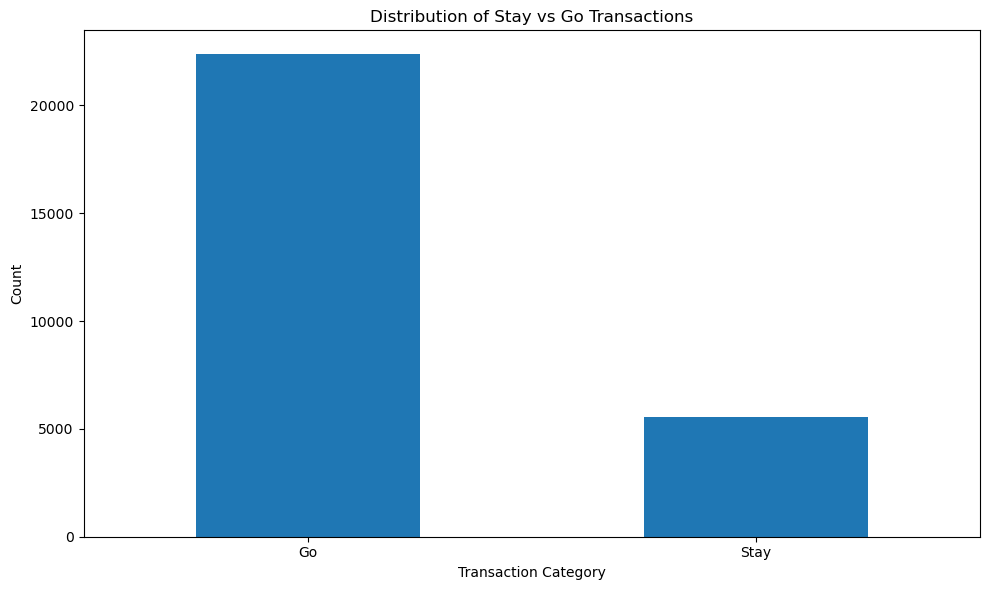

In [848]:
plt.figure(figsize=(10, 6))
focused_lease['transaction_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Stay vs Go Transactions')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [849]:
focused_lease["internal_industry"].unique()

array(['Financial Services and Insurance',
       'Construction, Engineering and Architecture',
       'Technology, Advertising, Media, and Information', nan,
       'Manufacturing (except Pharmaceutical, Retail, and Computer Tech)',
       'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)',
       'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting',
       'Education', 'Legal Services', 'Personal Services and Recreation',
       'Real Estate (except coworking providers)',
       'Coworking and Executive Suite Companies', 'Transportation',
       'Government', 'Energy & Utilities', 'Healthcare', 'Retail', 'TBD',
       'Agriculture, Forestry, Fishing, Metal & Mineral Mining',
       'Unclassifiable', 'Pharmaceuticals'], dtype=object)

In [850]:
specified_industries = ["Technology, Advertising, Media, and Information", "Financial Services and Insurance", "Legal Services"]
top3_industries = focused_lease[focused_lease["internal_industry"].isin(specified_industries)]
top3_industries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7036 entries, 0 to 29483
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            7036 non-null   int64  
 1   quarter                         7036 non-null   object 
 2   monthsigned                     6732 non-null   float64
 3   market                          7036 non-null   object 
 4   building_name                   5894 non-null   object 
 5   building_id                     7036 non-null   object 
 6   address                         7036 non-null   object 
 7   region                          7036 non-null   object 
 8   city                            7036 non-null   object 
 9   state                           7036 non-null   object 
 10  zip                             7036 non-null   float64
 11  internal_submarket              7036 non-null   object 
 12  internal_class                  7035 n

In [851]:
top3_industries["region"].unique()

array(['South', 'Midwest/Central', 'West', 'Northeast'], dtype=object)

In [852]:
region_counts = top3_industries['region'].value_counts()
print(region_counts)

region
Northeast          3280
West               1578
South              1458
Midwest/Central     720
Name: count, dtype: int64


In [853]:
leases_by_region_year = top3_industries.groupby(['year', 'region']).size()
print(leases_by_region_year)

year  region         
2018  Midwest/Central     84
      Northeast          400
      South              179
      West               173
2019  Midwest/Central    108
      Northeast          472
      South              229
      West               216
2020  Midwest/Central     71
      Northeast          400
      South              171
      West               191
2021  Midwest/Central    118
      Northeast          483
      South              202
      West               225
2022  Midwest/Central     92
      Northeast          546
      South              195
      West               207
2023  Midwest/Central    115
      Northeast          478
      South              194
      West               238
2024  Midwest/Central    132
      Northeast          501
      South              288
      West               328
dtype: int64


In [854]:
region_year_pivot = leases_by_region_year.unstack(level='region', fill_value=0)
display(region_year_pivot)

region,Midwest/Central,Northeast,South,West
year,,,,
2018,84,400,179,173
2019,108,472,229,216
2020,71,400,171,191
2021,118,483,202,225
2022,92,546,195,207
2023,115,478,194,238
2024,132,501,288,328


<Figure size 1200x800 with 0 Axes>

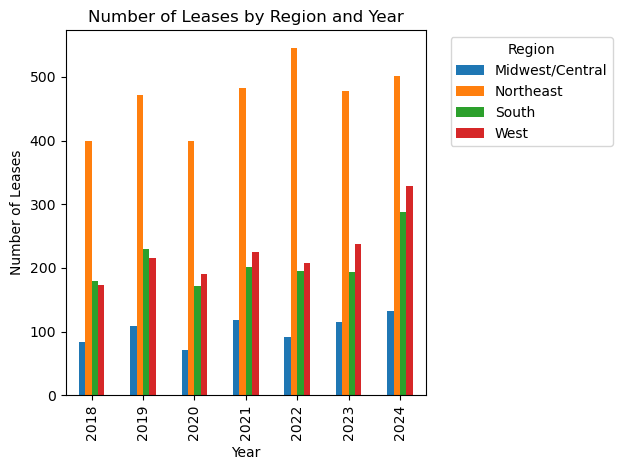

In [855]:
plt.figure(figsize=(12, 8))
region_year_pivot.plot(kind='bar', stacked=False)
plt.title('Number of Leases by Region and Year')
plt.xlabel('Year')
plt.ylabel('Number of Leases')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [856]:
region_year_proportions = region_year_pivot.div(region_year_pivot.sum(axis=1), axis=0) * 100
print(region_year_proportions)

region  Midwest/Central  Northeast      South       West
year                                                    
2018          10.047847  47.846890  21.411483  20.693780
2019          10.536585  46.048780  22.341463  21.073171
2020           8.523409  48.019208  20.528211  22.929172
2021          11.478599  46.984436  19.649805  21.887160
2022           8.846154  52.500000  18.750000  19.903846
2023          11.219512  46.634146  18.926829  23.219512
2024          10.568455  40.112090  23.058447  26.261009


<Figure size 1200x800 with 0 Axes>

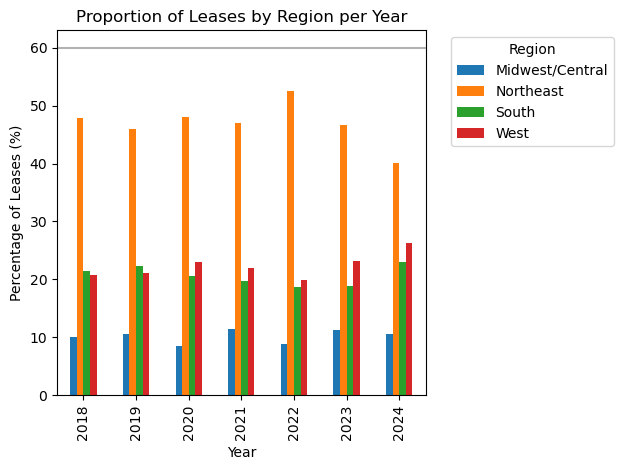

In [857]:
plt.figure(figsize=(12, 8))
region_year_proportions.plot(kind='bar', stacked=False)
plt.title('Proportion of Leases by Region per Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Leases (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(y=60, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

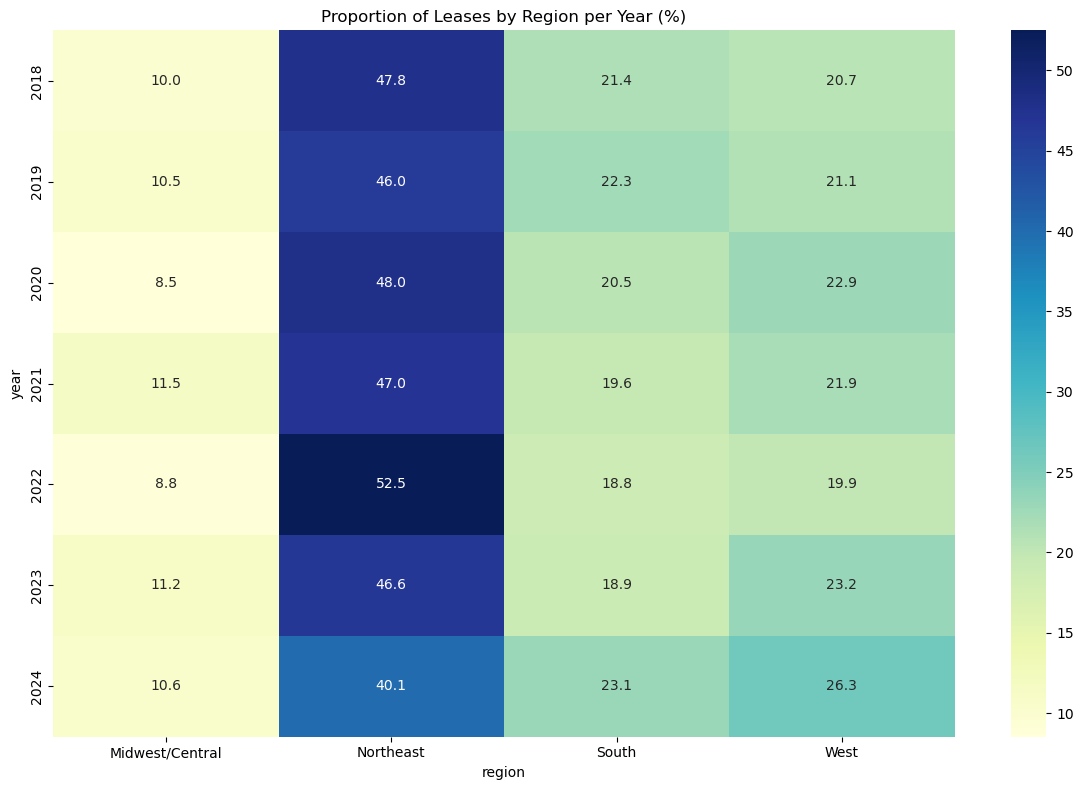

In [858]:
plt.figure(figsize=(12, 8))
sns.heatmap(region_year_proportions, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Proportion of Leases by Region per Year (%)')
plt.tight_layout()
plt.show()

In [859]:
tech_leases = focused_lease[focused_lease['internal_industry'] == 'Technology, Advertising, Media, and Information']
tech_leases_by_region_year = tech_leases.groupby(['year', 'region']).size()
tech_region_year_pivot = tech_leases_by_region_year.unstack(level='region', fill_value=0)
tech_region_year_proportions = tech_region_year_pivot.div(tech_region_year_pivot.sum(axis=1), axis=0) * 100

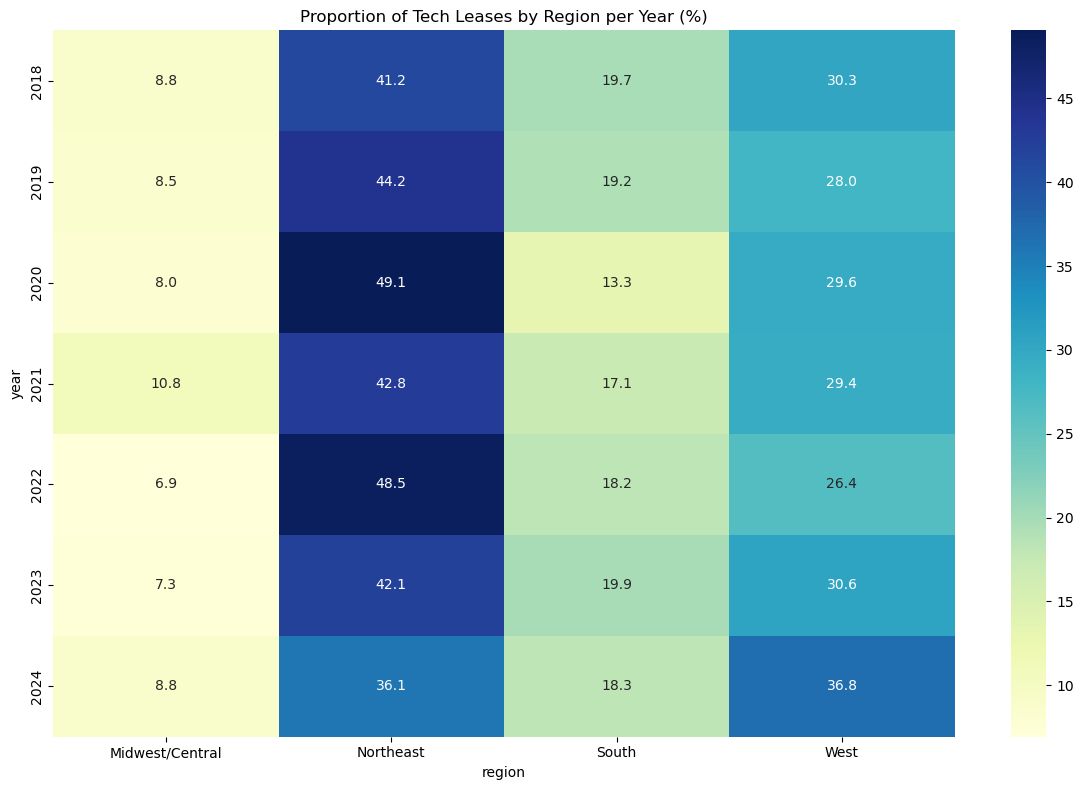

In [860]:
plt.figure(figsize=(12, 8))
sns.heatmap(tech_region_year_proportions, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Proportion of Tech Leases by Region per Year (%)')
plt.tight_layout()
plt.show()

In [861]:
qTech_leases = tech_leases.groupby(['year_quarter', 'region']).size()
qTech_region_pivot = qTech_leases.unstack(level='region', fill_value=0)
qTech_region_proportions = qTech_region_pivot.div(qTech_region_pivot.sum(axis=1), axis=0) * 100

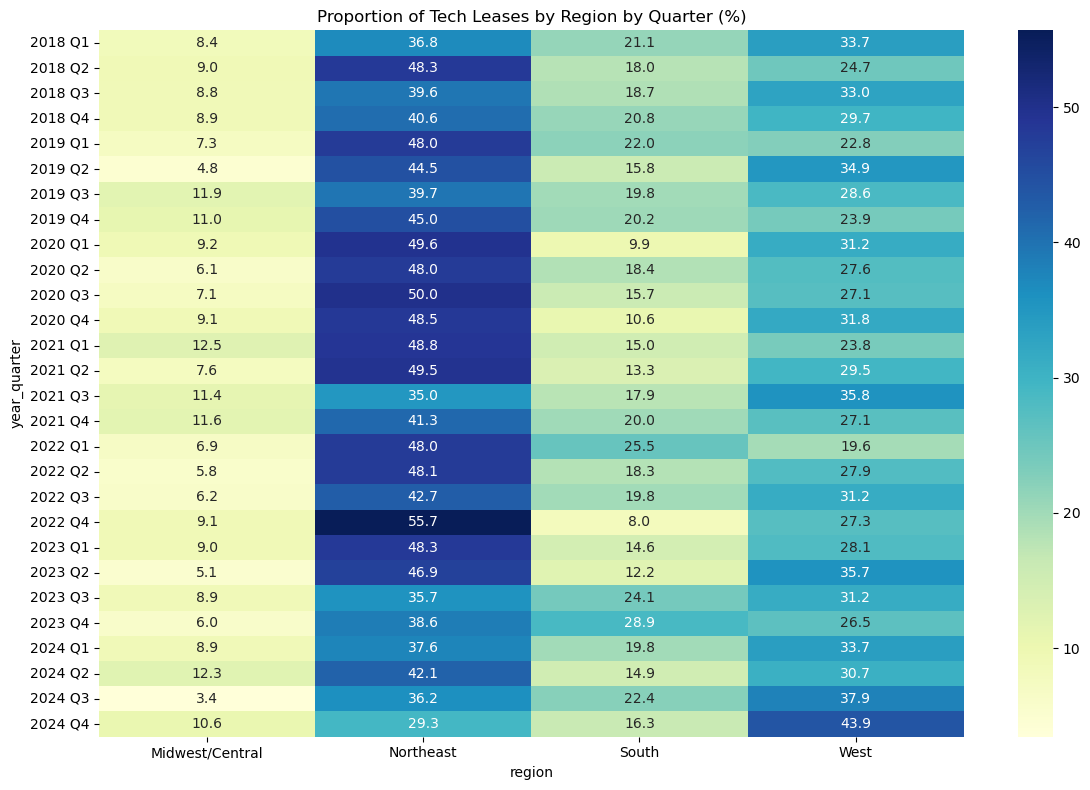

In [862]:
plt.figure(figsize=(12, 8))
sns.heatmap(qTech_region_proportions, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Proportion of Tech Leases by Region by Quarter (%)')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

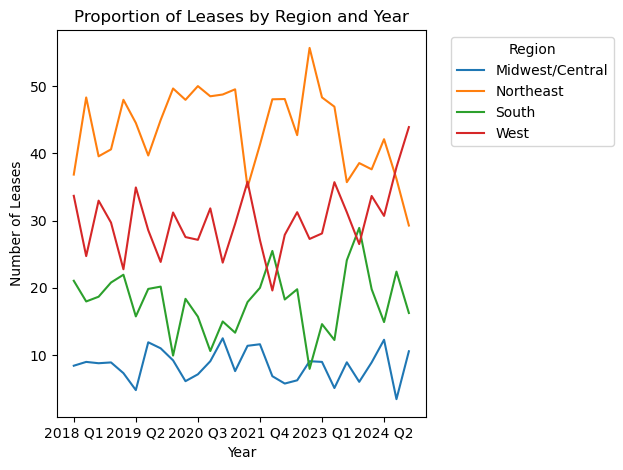

In [863]:
plt.figure(figsize=(12, 8))
qTech_region_proportions.plot(kind='line', stacked=False)
plt.title('Proportion of Leases by Region and Year')
plt.xlabel('Year')
plt.ylabel('Number of Leases')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

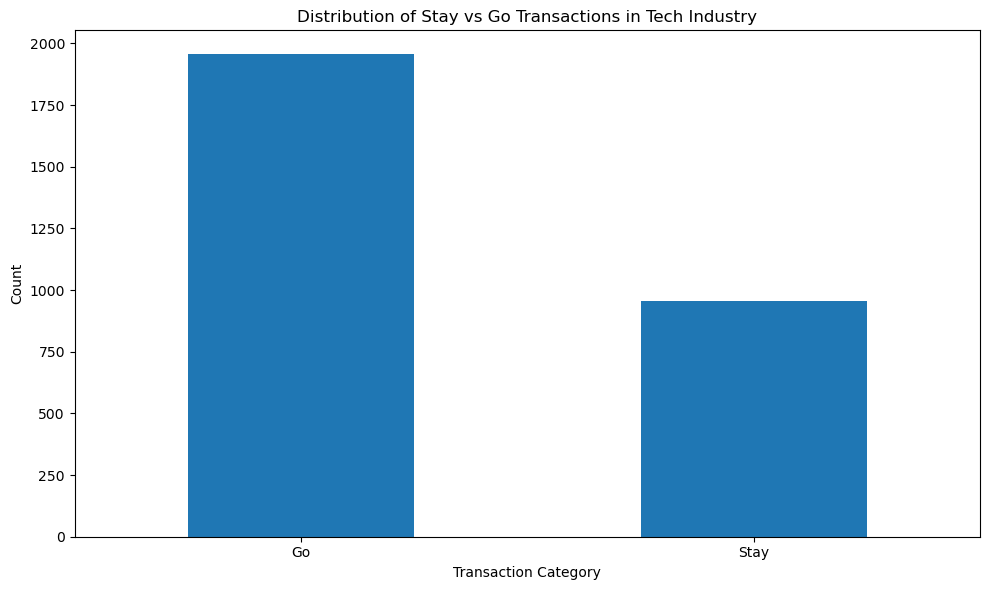

In [864]:
plt.figure(figsize=(10, 6))
tech_leases["transaction_category"].value_counts().plot(kind='bar')
plt.title('Distribution of Stay vs Go Transactions in Tech Industry')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [865]:
sgTech_leases = tech_leases.groupby(['year_quarter', 'transaction_category']).size()
sgTech_trans_pivot = sgTech_leases.unstack(level='transaction_category', fill_value=0)
sgTech_trans_proportions = sgTech_trans_pivot.div(sgTech_trans_pivot.sum(axis=1), axis=0) * 100
print(sgTech_trans_proportions)

transaction_category         Go       Stay
year_quarter                              
2018 Q1               71.276596  28.723404
2018 Q2               70.786517  29.213483
2018 Q3               69.662921  30.337079
2018 Q4               74.000000  26.000000
2019 Q1               77.685950  22.314050
2019 Q2               73.529412  26.470588
2019 Q3               69.600000  30.400000
2019 Q4               72.641509  27.358491
2020 Q1               70.000000  30.000000
2020 Q2               64.285714  35.714286
2020 Q3               51.428571  48.571429
2020 Q4               53.030303  46.969697
2021 Q1               56.250000  43.750000
2021 Q2               72.380952  27.619048
2021 Q3               68.852459  31.147541
2021 Q4               77.419355  22.580645
2022 Q1               71.000000  29.000000
2022 Q2               76.470588  23.529412
2022 Q3               75.531915  24.468085
2022 Q4               66.666667  33.333333
2023 Q1               56.818182  43.181818
2023 Q2    

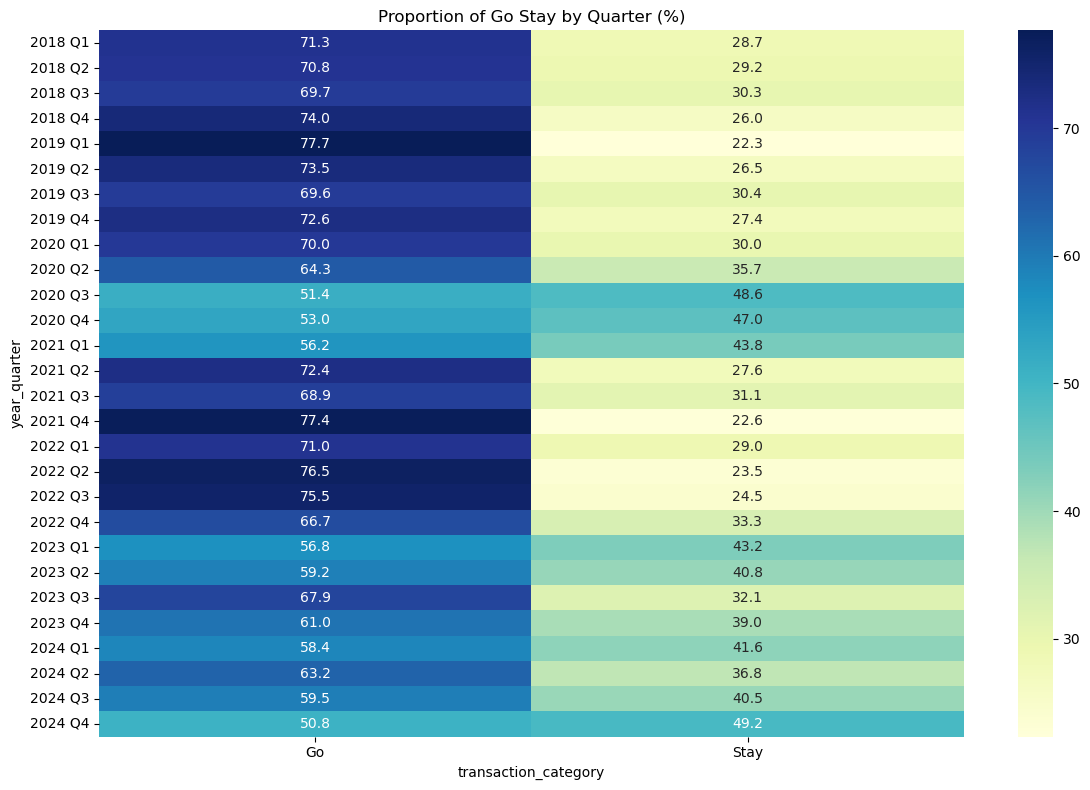

In [866]:
plt.figure(figsize=(12, 8))
sns.heatmap(sgTech_trans_proportions, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Proportion of Go Stay by Quarter (%)')
plt.tight_layout()
plt.show()

In [867]:
sgTech_leases_region = tech_leases.groupby(['year_quarter', 'transaction_category', 'region']).size()
sgTech_trans_region_pivot = sgTech_leases_region.unstack(level='transaction_category', fill_value=0)
sgTech_trans_proportions_region = sgTech_trans_region_pivot.div(sgTech_trans_region_pivot.sum(axis=1), axis=0) * 100
display(sgTech_trans_proportions_region)

transaction_category                 Go       Stay
year_quarter region                               
2018 Q1      Midwest/Central  85.714286  14.285714
             Northeast        68.571429  31.428571
             South            70.000000  30.000000
             West             71.875000  28.125000
2018 Q2      Midwest/Central  37.500000  62.500000
...                                 ...        ...
2024 Q3      West             72.727273  27.272727
2024 Q4      Midwest/Central  46.153846  53.846154
             Northeast        50.000000  50.000000
             South            68.421053  31.578947
             West             46.296296  53.703704

[112 rows x 2 columns]

In [868]:
byRegion = sgTech_trans_proportions_region.unstack(level='region', fill_value=0)
new_columns = []
for col in byRegion.columns:
    transaction, region = col
    new_columns.append(f"{region} - {transaction}")
byRegion.columns = new_columns
display(byRegion)

,Midwest/Central - Go,Northeast - Go,South - Go,West - Go,Midwest/Central - Stay,Northeast - Stay,South - Stay,West - Stay
year_quarter,,,,,,,,
2018 Q1,85.714286,68.571429,70.000000,71.875000,14.285714,31.428571,30.000000,28.125000
2018 Q2,37.500000,65.116279,87.500000,81.818182,62.500000,34.883721,12.500000,18.181818
2018 Q3,71.428571,52.777778,62.500000,93.333333,28.571429,47.222222,37.500000,6.666667
2018 Q4,77.777778,70.731707,60.000000,86.666667,22.222222,29.268293,40.000000,13.333333
2019 Q1,100.000000,70.689655,77.777778,85.185185,0.000000,29.310345,22.222222,14.814815
2019 Q2,100.000000,65.573770,76.190476,80.000000,0.000000,34.426230,23.809524,20.000000
2019 Q3,92.857143,54.000000,68.000000,83.333333,7.142857,46.000000,32.000000,16.666667
2019 Q4,90.909091,64.583333,71.428571,80.769231,9.090909,35.416667,28.571429,19.230769
2020 Q1,66.666667,68.571429,78.571429,70.454545,33.333333,31.428571,21.428571,29.545455


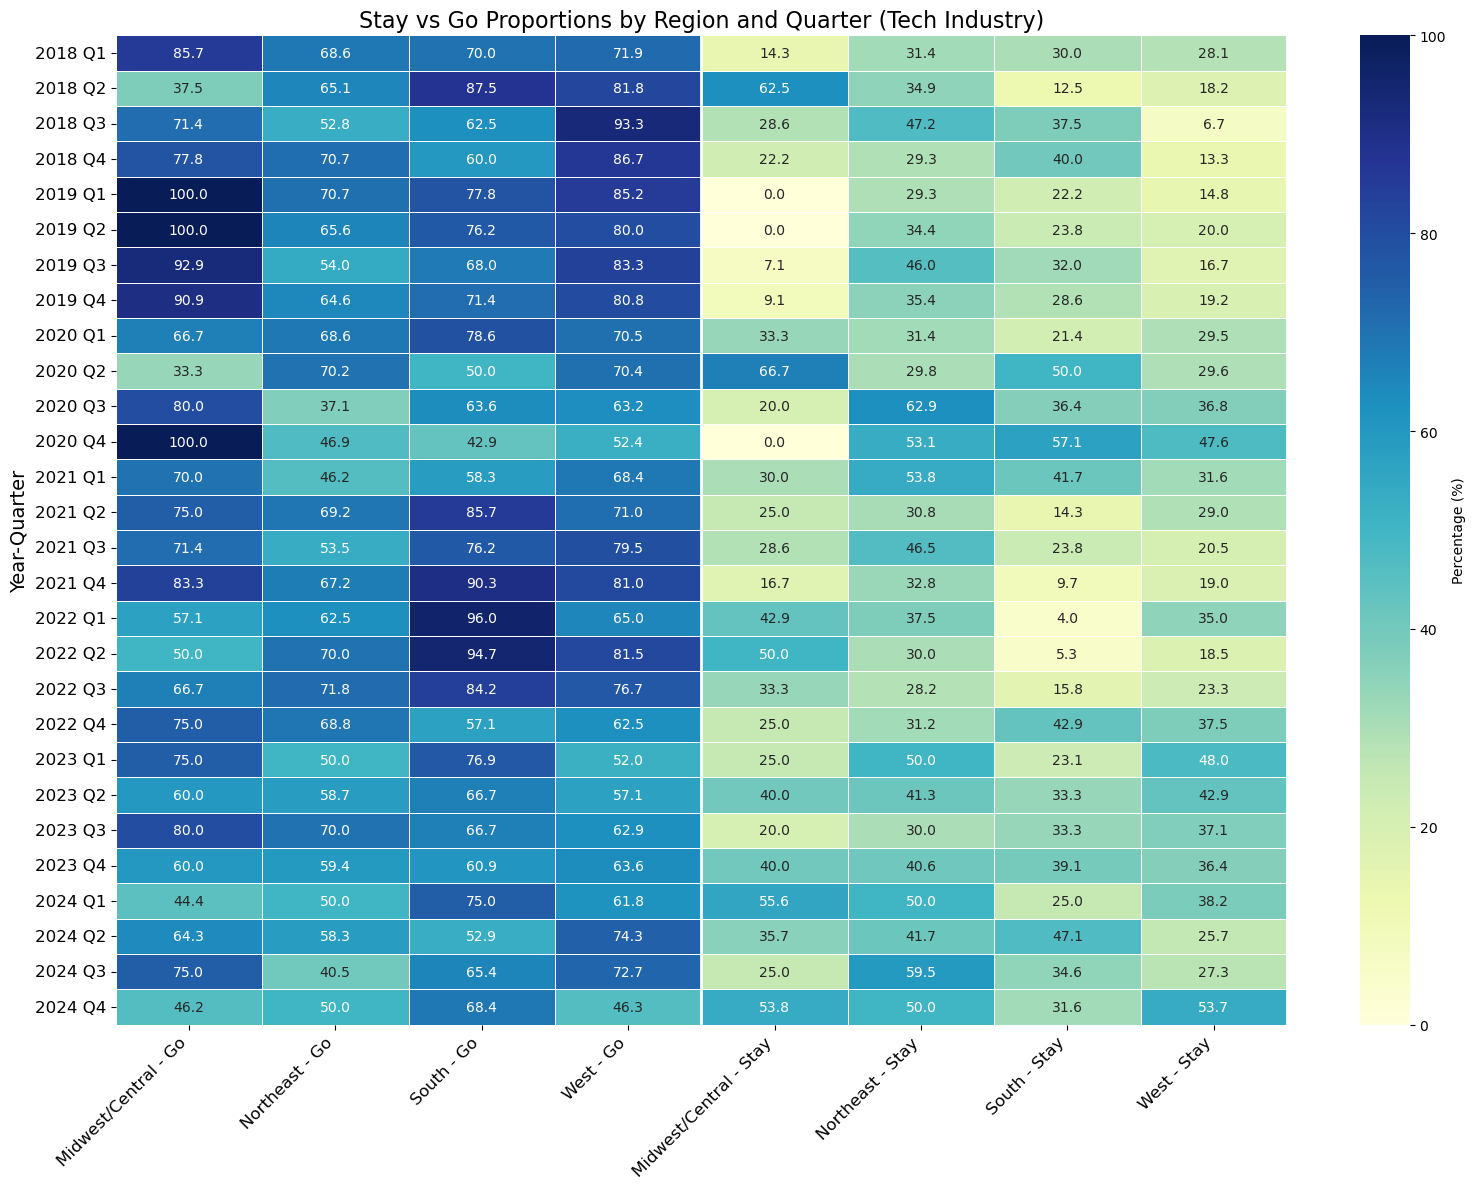

In [869]:
plt.figure(figsize=(16, 12))

sns.heatmap(byRegion, annot=True, cmap='YlGnBu', fmt='.1f', 
            linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})

plt.title('Stay vs Go Proportions by Region and Quarter (Tech Industry)', fontsize=16)
plt.ylabel('Year-Quarter', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

region_count = 4
col_width = len(byRegion.columns) / region_count
for i in range(1, region_count):
    plt.axvline(x=i*col_width*2, color='white', linewidth=2)

plt.tight_layout()
plt.show()

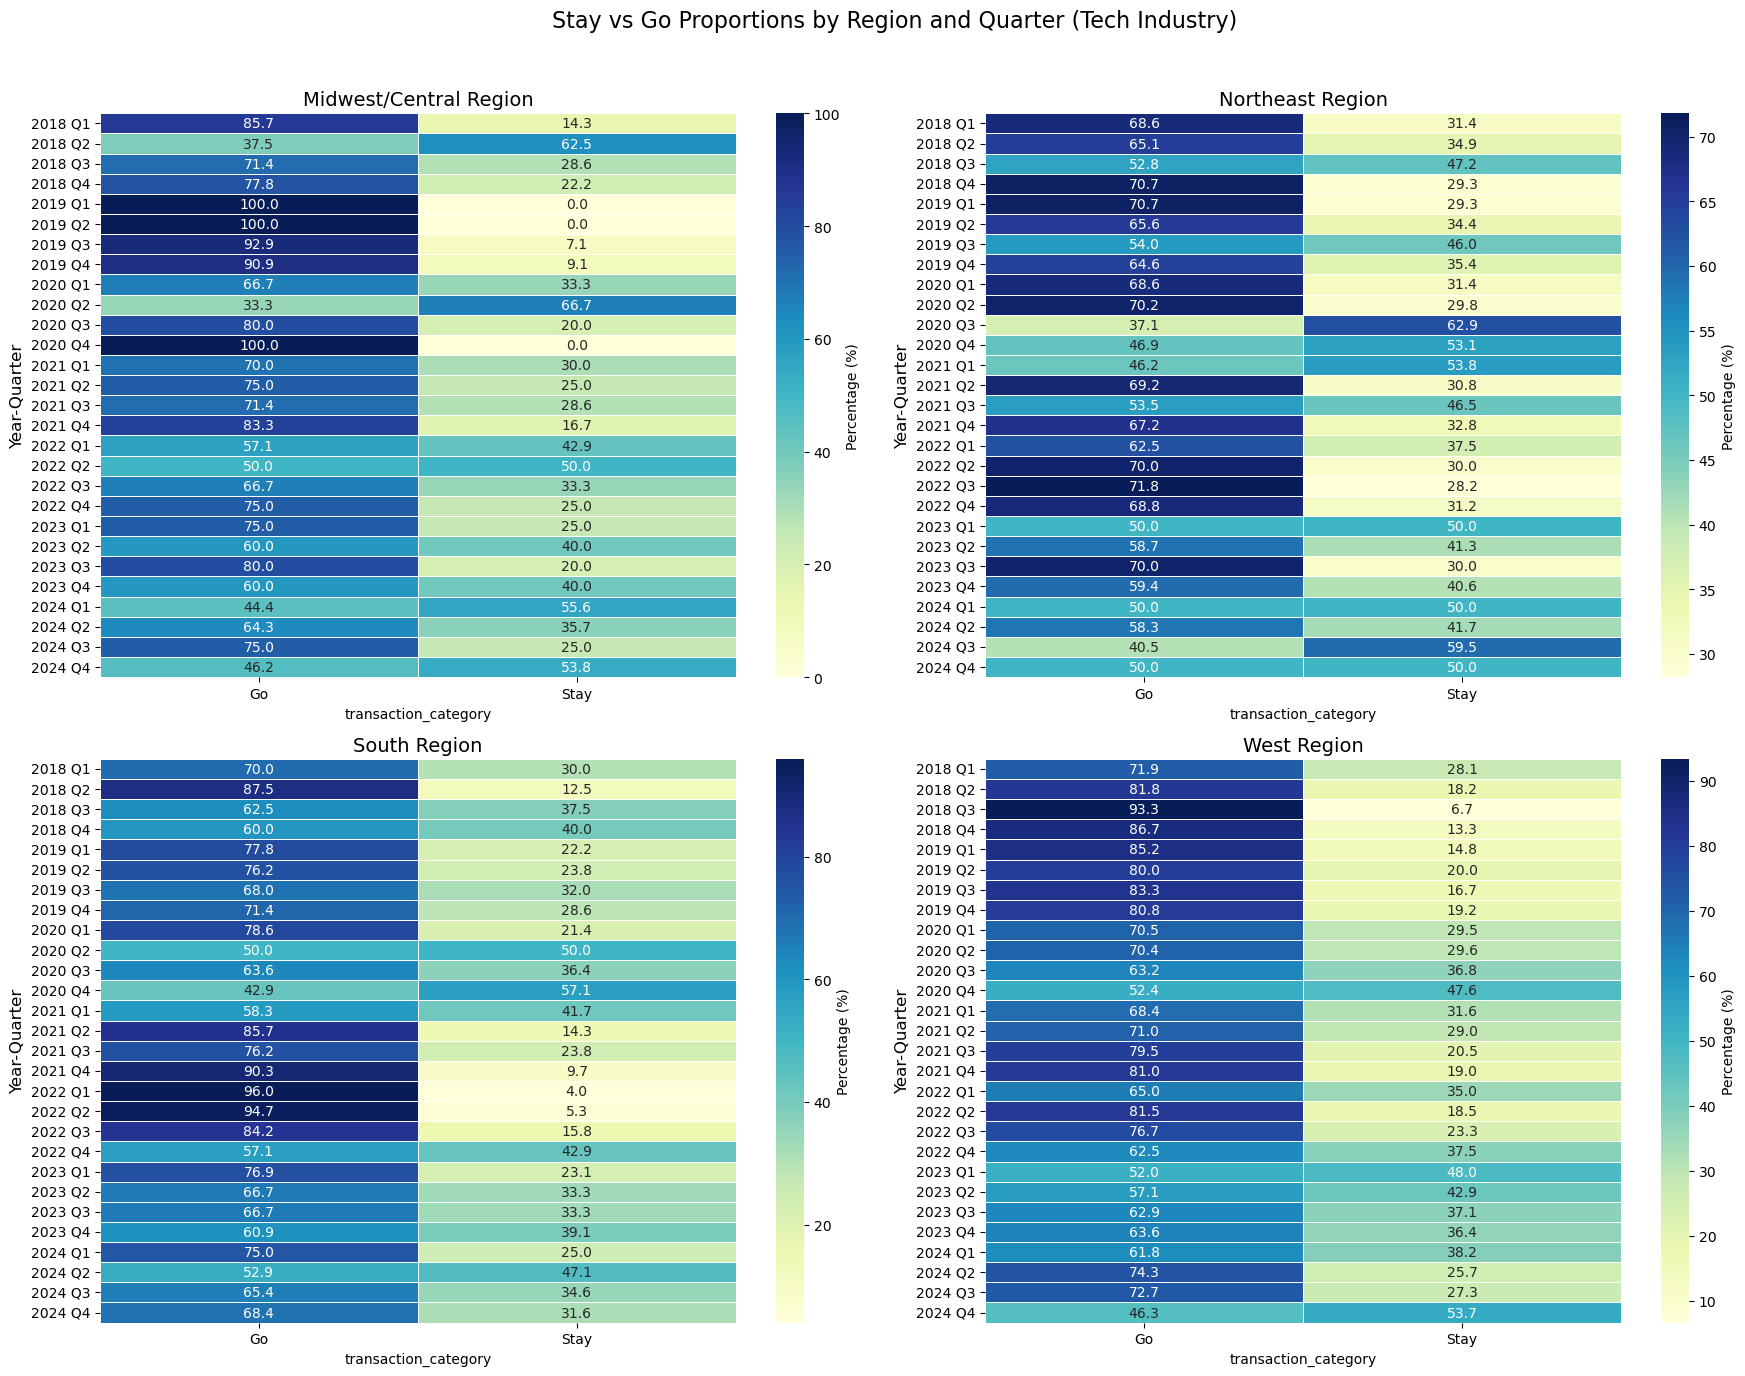

In [870]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

regions = ["Midwest/Central", "Northeast", "South", "West"]

for i, region in enumerate(regions):
    region_data = sgTech_trans_proportions_region.xs(region, level='region')
    sns.heatmap(region_data, annot=True, cmap='YlGnBu', fmt='.1f', 
                linewidths=0.5, ax=axes[i], cbar_kws={'label': 'Percentage (%)'})
    
    axes[i].set_title(f'{region} Region', fontsize=14)
    axes[i].set_ylabel('Year-Quarter', fontsize=12)

plt.suptitle('Stay vs Go Proportions by Region and Quarter (Tech Industry)', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [871]:
display(qTech_leases)

year_quarter  region         
2018 Q1       Midwest/Central     8
              Northeast          35
              South              20
              West               32
2018 Q2       Midwest/Central     8
                                 ..
2024 Q3       West               44
2024 Q4       Midwest/Central    13
              Northeast          36
              South              20
              West               54
Length: 112, dtype: int64

In [872]:
west_northEast = qTech_leases.unstack(level='region').loc[:, ['West', 'Northeast']]
display(west_northEast)

region,West,Northeast
year_quarter,,
2018 Q1,32,35
2018 Q2,22,43
2018 Q3,30,36
2018 Q4,30,41
2019 Q1,28,59
2019 Q2,51,65
2019 Q3,36,50
2019 Q4,26,49
2020 Q1,44,70


<Figure size 1400x700 with 0 Axes>

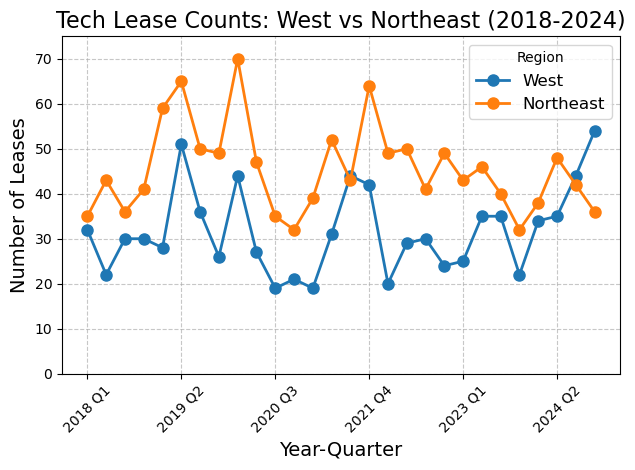

In [873]:
plt.figure(figsize=(14, 7))
west_northEast.plot(marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('Tech Lease Counts: West vs Northeast (2018-2024)', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.ylim(0, 75)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='Region', fontsize=12)
plt.tight_layout()
plt.show()